<a href="https://colab.research.google.com/github/minchillo4/factor-invest/blob/main/factor_investing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Análise Quantitativa de Ações B3** 📊

No mundo dos investimentos, tomar decisões informadas é essencial para o sucesso. Com a ascensão da tecnologia e o acesso a uma **vasta quantidade de dados**, os investidores brasileiros têm agora a capacidade de realizar análises mais precisas e abrangentes do mercado de ações. Essa abundância de informações proporciona uma vantagem significativa, permitindo uma compreensão mais profunda das tendências do mercado, dos fundamentos das empresas e dos padrões de comportamento dos investidores.

<br>



Vale ressaltar que a vasta quantidade de ações listadas na B3, a bolsa de valores brasileira, torna a análise ainda mais complexa. Com centenas de empresas negociadas diariamente, é fundamental dispor de ferramentas e metodologias eficazes para filtrar e avaliar essas opções de investimento de forma inteligente e eficiente



# **O Projeto**


Para este problema, resolvi utilizar uma simplificação da **metodologia de investimento por fatores**. O investimento por fatores, também conhecido como factor investing, é uma abordagem fundamentada na identificação e exploração de variáveis específicas que influenciam os retornos dos ativos.


Segundo artigo da XP Invesitmentos, é possível agrupar fatores em três categorias, sendo elas:
<br>

1.   **fatores macroeconômicos**: Implicam que alguns ativos podem ser impulsionados pelas mudanças nas variáveis ​​macro e no cenário econômico. Esses fatores tentam explicar o risco entre diferentes classes de ativos.
<br>
2.   **fatores estatísticos ou implícitos**: Representam um resultado estatístico intrínseco ou implícito nos dados que podem não ter explicações de risco ou comportamentais. Devido à falta de intuição, esses fatores são menos explorados e menos confiáveis.
<br>
3.   **fatores de estilo**:Refletem características específicas das empresas que podem influenciar seu desempenho financeiro. Nos aprofundaremos mais nessa categoria em breve.

<br>

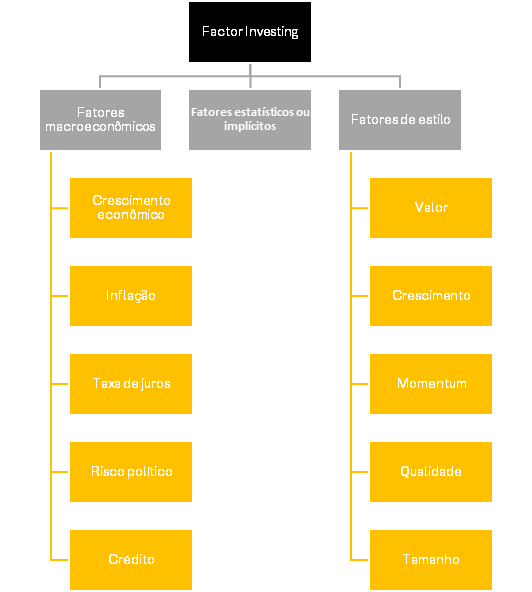

###### *Fonte: MSCI, Blackrock e XP Research.*

<br>


## Primeira parte: Fatores de Estilo

Como a primeira parte deste projeto, vou focar nos **fatores de estilo**. A análise detalhada desses fatores é essencial para entender como as características específicas das empresas podem afetar seu desempenho financeiro.
<br>
Segundo pesquisa da XP Investimento em conjunto com a BlackRock, podemos segregar os fatores de estilo em diferentes categorias:
<br>
1. **Momentum**: O fator momentum pode ser definido como a tendência de ativos que tiveram um bom desempenho no passado recente continuarem a ter um desempenho relativamente bom no futuro, pelo menos por um curto período de tempo.
<br>
2. **Valor** :  tendência de ativos relativamente baratos terem performance superior aos ativos relativamente caros no longo prazo.
<br>
3. **Crescimento**:definido como a tendência de ativos que entregaram (ou se espera que entreguem) perspectivas de crescimento a superarem aqueles que não entregaram.
<br>
4. **Baixo Risco**:fator de baixo risco pode ser definido como a tendência de ativos que tiveram menor volatilidade no passado para obter maiores retornos ajustados ao risco em relação a ativos com maior volatilidade.
<br>
5. **Qualidade**:O fator qualidade pode ser definido como a tendência de empresas de alta qualidade e lucrativas superarem as de menor qualidade e menos lucrativas.

Podemos agora começar a colher fatores para a nossa análise...





Primeiro, vamos baixar as bilbiotecas necessárias para o nosso projeto.

In [ ]:
!pip install fundamentus
!pip install yfinance
!pip install vaderSentiment

!pip install googletrans==4.0.0-rc1
!pip install GoogleNews
!pip install newspaper3k
!pip install --upgrade deepl
!pip install translators --upgrade
!pip install finvader
;

''

In [ ]:
import fundamentus
import pandas as pd
import numpy as np
import yfinance as yf
import sqlite3


Usaremos a biblioteca fundamentus para colher indicadores fundamentalistas de ações da B3. Serão os nossos primeiros fatores.

In [ ]:
df_acoes = fundamentus.get_resultado_raw()
df_acoes

Multiples,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
papel,,,,,,,,,,,,,,,,,,,,
AALR3,8.16,-3.67,0.95,0.836,0.0000,0.351,-4.32,45.24,-0.89,80.71,12.45,0.0185,-0.2210,0.74,0.0091,-0.2592,1348380.0,1.015110e+09,1.04,0.0354
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1429,0.0,5.721810e+09,0.00,0.7094
ABCB4,24.55,7.12,1.02,0.000,0.0613,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1429,14152900.0,5.721810e+09,0.00,0.7094
ABEV3,13.07,13.65,2.28,2.498,0.0559,1.493,55.55,12.11,-23.40,11.29,8.31,0.2063,0.1882,1.11,0.1650,0.1671,279068000.0,9.025490e+10,0.04,0.1323
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,2.09,0.0278,-0.0082,0.0,2.920600e+08,1.31,0.1641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WLMM4,26.82,9.24,1.46,0.462,0.0335,1.183,2.70,7.65,3.17,6.93,6.70,0.0603,0.0499,4.54,0.1834,0.1577,19561.6,6.698980e+08,0.01,0.2265
WMBY3,25.39,-19.30,2.87,0.836,0.0000,0.182,1.20,8.62,-1.50,25.02,25.02,0.0970,-0.0705,1.44,0.0239,-0.1486,0.0,2.124390e+08,6.51,-0.1448
WSON33,67.00,8.07,0.98,1.067,0.0000,0.400,13.41,2.42,-0.89,5.08,5.08,0.4414,0.1358,1.26,0.1836,0.1217,0.0,2.148530e+09,1.21,0.0523


Obtivemos um dataframe com 986 linhas, enquanto a B3 possui aproximadamente 400 componentes. Essa disparidade se deve ao fato de que a Fundamentus nos fornece dados de empresas que já não fazem mais parte da B3.

In [ ]:
print(df_acoes.columns)

Index(['Cotação', 'P/L', 'P/VP', 'PSR', 'Div.Yield', 'P/Ativo', 'P/Cap.Giro',
       'P/EBIT', 'P/Ativ Circ.Liq', 'EV/EBIT', 'EV/EBITDA', 'Mrg Ebit',
       'Mrg. Líq.', 'Liq. Corr.', 'ROIC', 'ROE', 'Liq.2meses', 'Patrim. Líq',
       'Dív.Brut/ Patrim.', 'Cresc. Rec.5a'],
      dtype='object', name='Multiples')


Com esses indicadores fundamentalistas, conseguimos obter dados para duas categorias de estilo, Valor e Qualidade:

### Value (Valor):

* P/L (Preço/Lucro)
* P/VP (Preço/Valor Patrimonial)
* PSR (Preço/Sales)
* P/Cap.Giro
* P/Ativo (Preço/Ativo)
* P/EBIT (Preço/EBIT)
* P/EBITDA (Preço/EBITDA)
* Dív.Brut/Patrim. (Dívida Bruta/Patrimônio)

### Quality (Qualidade):

* Mrg Ebit (Margem EBIT)
* Mrg. Líq. (Margem Líquida)
* ROIC (Retorno sobre o Capital Investido)
* ROE (Retorno sobre o Patrimônio Líquido)





In [ ]:
df_acoes.head(5)

Multiples,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
papel,,,,,,,,,,,,,,,,,,,,
AALR3,8.16,-3.67,0.95,0.836,0.0000,0.351,-4.32,45.24,-0.89,80.71,12.45,0.0185,-0.2210,0.74,0.0091,-0.2592,1348380.0,1.015110e+09,1.04,0.0354
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1429,0.0,5.721810e+09,0.00,0.7094
ABCB4,24.55,7.12,1.02,0.000,0.0613,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1429,14152900.0,5.721810e+09,0.00,0.7094
ABEV3,13.07,13.65,2.28,2.498,0.0559,1.493,55.55,12.11,-23.40,11.29,8.31,0.2063,0.1882,1.11,0.1650,0.1671,279068000.0,9.025490e+10,0.04,0.1323
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,33.67,0.1029,-0.0096,2.09,0.0278,-0.0082,0.0,2.920600e+08,1.31,0.1641


É necessário observar que a lista de ações da biblioteca fundamentus possuí ativos que atualmente não são parte  da B3. Por isso, vamos usar uma função para filtrar somente as ações que estão sendo negociadas atualmente.

<br>

O objetivo da função é iterar na lista de ações da biblioteca fundamentus e buscar entender, através da biblioteca yf (yfinance) se a ação está sendo negociada recentemente.


In [ ]:
l_acoes = []

In [ ]:
from datetime import datetime, timedelta

def is_traded_recently(acao):
  try:
    stock = yf.Ticker(acao)
    historical_data = stock.history(period='1mo')

    last_trading_day = historical_data.index[-1].date()

    today = datetime.now().date()
    window_start = today - timedelta(days=5)
    return window_start <= last_trading_day <= today
  except Exception:
    return False


Vamos também criar uma coluna ACAO  que íra nos ajudar posteriormente.

In [ ]:
df_acoes['ACAO'] = df_acoes.index + '.SA'
df_acoes

Multiples,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,...,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a,ACAO
papel,,,,,,,,,,,,,,,,,,,,,
AALR3,8.16,-3.67,0.95,0.836,0.0000,0.351,-4.32,45.24,-0.89,80.71,...,0.0185,-0.2210,0.74,0.0091,-0.2592,1348380.0,1.015110e+09,1.04,0.0354,AALR3.SA
ABCB3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.1429,0.0,5.721810e+09,0.00,0.7094,ABCB3.SA
ABCB4,24.55,7.12,1.02,0.000,0.0613,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.0000,0.00,0.0000,0.1429,14152900.0,5.721810e+09,0.00,0.7094,ABCB4.SA
ABEV3,13.07,13.65,2.28,2.498,0.0559,1.493,55.55,12.11,-23.40,11.29,...,0.2063,0.1882,1.11,0.1650,0.1671,279068000.0,9.025490e+10,0.04,0.1323,ABEV3.SA
ABYA3,4.91,-214.80,1.76,2.055,0.0000,0.527,1.98,19.96,-2.75,33.67,...,0.1029,-0.0096,2.09,0.0278,-0.0082,0.0,2.920600e+08,1.31,0.1641,ABYA3.SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WLMM4,26.82,9.24,1.46,0.462,0.0335,1.183,2.70,7.65,3.17,6.93,...,0.0603,0.0499,4.54,0.1834,0.1577,19561.6,6.698980e+08,0.01,0.2265,WLMM4.SA
WMBY3,25.39,-19.30,2.87,0.836,0.0000,0.182,1.20,8.62,-1.50,25.02,...,0.0970,-0.0705,1.44,0.0239,-0.1486,0.0,2.124390e+08,6.51,-0.1448,WMBY3.SA
WSON33,67.00,8.07,0.98,1.067,0.0000,0.400,13.41,2.42,-0.89,5.08,...,0.4414,0.1358,1.26,0.1836,0.1217,0.0,2.148530e+09,1.21,0.0523,WSON33.SA


In [ ]:
 df_acoes['NEGOCIADA'] = df_acoes['ACAO'].apply(is_traded_recently)

ERROR:yfinance:ABCB3.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:ABYA3.SA: No data found, symbol may be delisted
ERROR:yfinance:ACES3.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:ACES4.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:AEDU11.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:AEDU3.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:AELP3.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:AESL3.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:AESL4.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:AFLU3.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:AFLU5.SA: No price data found, symbol may be delisted (period=1mo)
ERROR:yfinance:AGEI3.SA: No data found, symbol may be delisted
ERROR:yfinance:AGEN33.SA: No data found, symbol may b

Agora, podemos somente os fundamentos das ações sendo negociadas atualmente.

In [ ]:
df_acoes = df_acoes[df_acoes['NEGOCIADA'] == True]
df_acoes

Multiples,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,...,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a,ACAO,NEGOCIADA
papel,,,,,,,,,,,,,,,,,,,,,
AALR3,8.16,-3.67,0.95,0.836,0.0000,0.351,-4.32,45.24,-0.89,80.71,...,-0.2210,0.74,0.0091,-0.2592,1.348380e+06,1.015110e+09,1.04,0.0354,AALR3.SA,True
ABCB4,24.55,7.12,1.02,0.000,0.0613,0.000,0.00,0.00,0.00,0.00,...,0.0000,0.00,0.0000,0.1429,1.415290e+07,5.721810e+09,0.00,0.7094,ABCB4.SA,True
ABEV3,13.07,13.65,2.28,2.498,0.0559,1.493,55.55,12.11,-23.40,11.29,...,0.1882,1.11,0.1650,0.1671,2.790680e+08,9.025490e+10,0.04,0.1323,ABEV3.SA,True
ADHM3,1.56,-4.09,-1.29,770.924,0.0000,105.126,-1.43,-5.69,-1.27,-5.69,...,-188.6060,0.00,5.2170,0.3147,2.064000e+03,-1.977600e+07,0.00,0.4348,ADHM3.SA,True
AERI3,0.78,-8.86,1.19,0.300,0.0000,0.254,1.18,3.29,-2.31,6.77,...,-0.0339,1.46,0.1074,-0.1342,5.459030e+06,8.150790e+08,2.17,0.1041,AERI3.SA,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WIZC3,6.62,10.89,2.31,1.008,0.0672,0.462,-18.17,2.31,-1.28,2.53,...,0.1781,0.90,0.2437,0.2118,3.330230e+06,4.592540e+08,0.77,0.1169,WIZC3.SA,True
WLMM3,24.00,8.27,1.30,0.413,0.0340,1.059,2.42,6.85,2.84,6.13,...,0.0499,4.54,0.1834,0.1577,1.065630e+03,6.698980e+08,0.01,0.2265,WLMM3.SA,True
WLMM4,26.82,9.24,1.46,0.462,0.0335,1.183,2.70,7.65,3.17,6.93,...,0.0499,4.54,0.1834,0.1577,1.956160e+04,6.698980e+08,0.01,0.2265,WLMM4.SA,True


Vamos remover as colunas que não usarememos. Antes disso, criamos a variável acao_column para armazenar a lista de ações.


In [ ]:
acao_column = df_acoes['ACAO']
df_f = df_acoes.drop(['Cotação', 'Div.Yield','NEGOCIADA','ACAO','Patrim. Líq','Cresc. Rec.5a'], axis=1)
df_f

acao_column

papel
AALR3    AALR3.SA
ABCB4    ABCB4.SA
ABEV3    ABEV3.SA
ADHM3    ADHM3.SA
AERI3    AERI3.SA
           ...   
WIZC3    WIZC3.SA
WLMM3    WLMM3.SA
WLMM4    WLMM4.SA
YDUQ3    YDUQ3.SA
ZAMP3    ZAMP3.SA
Name: ACAO, Length: 474, dtype: object

Começaremos a organizar o nosso esquema de dados. Este dataframe será transformado em uma tabela no SQLITE.

In [ ]:
conn = sqlite3.connect(':memory:')
cur = conn.cursor()


Vamos usar a a função MinMaxScaler da biblioca sklearn para normalizar os nossos fundamentos de -1 a 1. Dessa forma, poderemos comparar os fatores de forma eficaz.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(-1, 1))


In [ ]:
# Inverse transform to get back the original data
scaled_data = scaler.fit_transform(df_f)

scaled_data


array([[ 0.67692492, -0.97136007, -0.98064364, ...,  0.85498708,
        -0.99842407, -0.33915771],
       [ 0.68772011, -0.97130209, -0.98141827, ...,  0.86125781,
        -0.9834587 , -0.38575269],
       [ 0.69425324, -0.97025853, -0.97910366, ...,  0.86163521,
        -0.67383738, -0.38396057],
       ...,
       [ 0.68984112, -0.97093767, -0.98099019, ...,  0.86148862,
        -0.99997714, -0.38530466],
       [ 0.71205178, -0.97063123, -0.98032675, ...,  0.85993536,
        -0.92361426, -0.31182796],
       [ 0.66863094, -0.97129381, -0.9810847 , ...,  0.85768033,
        -0.98764145, -0.34677419]])

In [ ]:
df_acao_scaled = pd.DataFrame(scaled_data, columns=df_f.columns)


In [ ]:
import pandas as pd

# Criar dataframe com coluna ACAO
df_acao = pd.DataFrame(acao_column, columns=['ACAO'])

# Adicionar os dados normalizados para o novo dataframedf_acao_scaled = pd.DataFrame(scaled_data, columns=df_f.columns)

# Resetar o índice para os dataframes e concatanena-los
df_acao.reset_index(drop=True, inplace=True)
df_acao_scaled.reset_index(drop=True, inplace=True)

result_df = pd.concat([df_acao, df_acao_scaled], axis=1)

# Mostrar os resultados
print(result_df)


         ACAO       P/L      P/VP       PSR   P/Ativo  P/Cap.Giro    P/EBIT  \
0    AALR3.SA  0.676925 -0.971360 -0.980644 -0.993322    0.751514 -0.344710   
1    ABCB4.SA  0.687720 -0.971302 -0.981418 -1.000000    0.751733 -0.407096   
2    ABEV3.SA  0.694253 -0.970259 -0.979104 -0.971596    0.754557 -0.390397   
3    ADHM3.SA  0.676505 -0.973215 -0.267092  1.000000    0.751661 -0.414943   
4    AERI3.SA  0.671732 -0.971161 -0.981140 -0.995168    0.751793 -0.402559   
..        ...       ...       ...       ...       ...         ...       ...   
469  WIZC3.SA  0.691492 -0.970234 -0.980484 -0.991211    0.750810 -0.403911   
470  WLMM3.SA  0.688871 -0.971070 -0.981036 -0.979853    0.751856 -0.397650   
471  WLMM4.SA  0.689841 -0.970938 -0.980990 -0.977494    0.751871 -0.396547   
472  YDUQ3.SA  0.712052 -0.970631 -0.980327 -0.988528    0.752079 -0.397071   
473  ZAMP3.SA  0.668631 -0.971294 -0.981085 -0.993417    0.754364 -0.387142   

     P/Ativ Circ.Liq   EV/EBIT  EV/EBITDA  Mrg Ebit

Posteriormente, usaremos a API do Alpha Vantage para obter dados históricos e calcular fatores de Momentum e Baixo Risco. Por motivos de armazenamento e limite de requisições, vamos reduzir o número de ações do dataframe através de um filtro, que selecionará apenas as melhores ações em termos de ROE,P/L e P/EBIT.



In [ ]:

quants = result_df.quantile(q=0.6, numeric_only=True)
quants_neg = result_df.quantile(q=0.3, numeric_only=True)

roe = quants['ROE']
pl = quants_neg['P/L']
ebit = quants_neg['P/EBIT']



In [ ]:

condition1 = (result_df['ROE'] >= roe)
condition2 = (result_df['P/L'] <=  pl)
condition3 = (result_df['P/EBIT'] <= ebit)

selected_stocks = result_df[condition1 & condition2 & condition3]

print(selected_stocks)


          ACAO       P/L      P/VP       PSR   P/Ativo  P/Cap.Giro    P/EBIT  \
3     ADHM3.SA  0.676505 -0.973215 -0.267092  1.000000    0.751661 -0.414943   
22    AMER3.SA  0.680537 -0.972172 -0.981392 -0.999562    0.751732 -0.407345   
128   CORR3.SA  0.680637 -0.972097 -0.980645 -0.999677    0.751735 -0.407207   
129   CORR4.SA  0.680867 -0.971807 -0.976136 -0.997755    0.751744 -0.407841   
167   DOTZ3.SA  0.679456 -0.972503 -0.980784 -0.993950    0.751708 -0.410282   
247   INEP3.SA  0.680116 -0.972230 -0.963843 -0.997279    0.751726 -0.411109   
248   INEP4.SA  0.680186 -0.972213 -0.966429 -0.997679    0.751727 -0.410516   
316   MWET3.SA  0.674874 -0.974333 -0.981327 -0.998174    0.751676 -0.413095   
317   MWET4.SA  0.677475 -0.973340 -0.981369 -0.999011    0.751702 -0.410365   
329   OIBR3.SA  0.680577 -0.972163 -0.981380 -0.999734    0.751728 -0.407234   
330   OIBR4.SA  0.680557 -0.972180 -0.981327 -0.999372    0.751721 -0.407441   
338   PDGR3.SA  0.680567 -0.972155 -0.98

In [ ]:
selected_stocks

,ACAO,P/L,P/VP,PSR,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Dív.Brut/ Patrim.
3,ADHM3.SA,0.676505,-0.973215,-0.267092,1.000000,0.751661,-0.414943,-0.764822,-0.624270,-0.497103,-0.280022,0.539758,-1.000000,1.000000,0.863937,-0.999998,-0.385753
22,AMER3.SA,0.680537,-0.972172,-0.981392,-0.999562,0.751732,-0.407345,-0.763066,-0.623571,-0.498399,0.975622,0.884480,-0.981267,0.609338,0.866580,-0.980358,-0.423835
128,CORR3.SA,0.680637,-0.972097,-0.980645,-0.999677,0.751735,-0.407207,-0.762448,-0.619630,-0.488719,0.878931,0.924636,-0.765840,0.563466,0.882865,-1.000000,-0.385753
129,CORR4.SA,0.680867,-0.971807,-0.976136,-0.997755,0.751744,-0.407841,-0.759050,-0.619867,-0.489148,0.878931,0.924636,-0.765840,0.563466,0.882865,-1.000000,-0.385753
167,DOTZ3.SA,0.679456,-0.972503,-0.980784,-0.993950,0.751708,-0.410282,-0.763389,-0.622542,-0.497760,0.974315,0.884299,-0.975758,0.606398,0.864876,-0.999882,-0.406810
247,INEP3.SA,0.680116,-0.972230,-0.963843,-0.997279,0.751726,-0.411109,-0.763122,-0.630413,-0.509338,0.916541,0.816754,-0.995592,0.621159,0.862198,-0.999649,-0.408154
248,INEP4.SA,0.680186,-0.972213,-0.966429,-0.997679,0.751727,-0.410516,-0.763108,-0.630192,-0.508909,0.916541,0.816754,-0.995592,0.621159,0.862198,-0.999779,-0.408154
316,MWET3.SA,0.674874,-0.974333,-0.981327,-0.998174,0.751676,-0.413095,-0.763249,-0.629847,-0.540648,0.976857,0.885366,-0.954821,0.623136,0.866220,-1.000000,-0.719086
317,MWET4.SA,0.677475,-0.973340,-0.981369,-0.999011,0.751702,-0.410365,-0.763151,-0.628829,-0.534800,0.976857,0.885366,-0.954821,0.623136,0.866220,-0.999973,-0.719086
329,OIBR3.SA,0.680577,-0.972163,-0.981380,-0.999734,0.751728,-0.407234,-0.763052,-0.624332,-0.502970,0.973393,0.881279,-0.960331,0.612049,0.872174,-0.996704,-0.427867


Filtraremos apenas as ações cuja terminação é '3.SA', que identifica ações ordinárias e com isso obtemos o nosso dataframe de fundamentos finalizado.

In [ ]:
filtro_selecionadas = selected_stocks[selected_stocks['ACAO'].str.endswith('3.SA')]
filtro_selecionadas



,ACAO,P/L,P/VP,PSR,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Dív.Brut/ Patrim.
3,ADHM3.SA,0.676505,-0.973215,-0.267092,1.000000,0.751661,-0.414943,-0.764822,-0.624270,-0.497103,-0.280022,0.539758,-1.000000,1.000000,0.863937,-0.999998,-0.385753
22,AMER3.SA,0.680537,-0.972172,-0.981392,-0.999562,0.751732,-0.407345,-0.763066,-0.623571,-0.498399,0.975622,0.884480,-0.981267,0.609338,0.866580,-0.980358,-0.423835
128,CORR3.SA,0.680637,-0.972097,-0.980645,-0.999677,0.751735,-0.407207,-0.762448,-0.619630,-0.488719,0.878931,0.924636,-0.765840,0.563466,0.882865,-1.000000,-0.385753
167,DOTZ3.SA,0.679456,-0.972503,-0.980784,-0.993950,0.751708,-0.410282,-0.763389,-0.622542,-0.497760,0.974315,0.884299,-0.975758,0.606398,0.864876,-0.999882,-0.406810
247,INEP3.SA,0.680116,-0.972230,-0.963843,-0.997279,0.751726,-0.411109,-0.763122,-0.630413,-0.509338,0.916541,0.816754,-0.995592,0.621159,0.862198,-0.999649,-0.408154
316,MWET3.SA,0.674874,-0.974333,-0.981327,-0.998174,0.751676,-0.413095,-0.763249,-0.629847,-0.540648,0.976857,0.885366,-0.954821,0.623136,0.866220,-1.000000,-0.719086
329,OIBR3.SA,0.680577,-0.972163,-0.981380,-0.999734,0.751728,-0.407234,-0.763052,-0.624332,-0.502970,0.973393,0.881279,-0.960331,0.612049,0.872174,-0.996704,-0.427867
338,PDGR3.SA,0.680567,-0.972155,-0.981232,-0.999505,0.751733,-0.409275,-0.763038,-0.663200,-0.569405,0.975889,0.872839,-0.987879,0.623165,0.861707,-0.994659,-0.397849
351,PMAM3.SA,0.680547,-0.972180,-0.981268,-0.998269,0.751731,-0.407441,-0.763080,-0.624147,-0.497614,0.971023,0.879954,-0.991736,0.586589,0.871348,-0.999887,-0.426523
378,RNEW3.SA,0.681117,-0.971816,-0.980182,-0.997755,0.751690,-0.422789,-0.763291,-0.645688,-0.477416,0.975978,0.890069,-0.989532,0.624128,0.870916,-0.999748,-0.327509


 Vamos realizar a multiplicação por -1 para lidar com indicadores financeiros que requerem inversão para a análise.


In [ ]:
colunas_reversas = ['P/L', 'P/VP','PSR','P/Ativo','P/Cap.Giro','Dív.Brut/ Patrim.','EV/EBIT','EV/EBITDA']
tickers_selecionados = filtro_selecionadas['ACAO']


filtro_selecionadas[colunas_reversas] *= -1
filtro_selecionadas

<ipython-input-130-2418dc24d173>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_selecionadas[colunas_reversas] *= -1


,ACAO,P/L,P/VP,PSR,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Dív.Brut/ Patrim.
3,ADHM3.SA,-0.676505,0.973215,0.267092,-1.000000,-0.751661,-0.414943,-0.764822,0.624270,0.497103,-0.280022,0.539758,-1.000000,1.000000,0.863937,-0.999998,0.385753
22,AMER3.SA,-0.680537,0.972172,0.981392,0.999562,-0.751732,-0.407345,-0.763066,0.623571,0.498399,0.975622,0.884480,-0.981267,0.609338,0.866580,-0.980358,0.423835
128,CORR3.SA,-0.680637,0.972097,0.980645,0.999677,-0.751735,-0.407207,-0.762448,0.619630,0.488719,0.878931,0.924636,-0.765840,0.563466,0.882865,-1.000000,0.385753
167,DOTZ3.SA,-0.679456,0.972503,0.980784,0.993950,-0.751708,-0.410282,-0.763389,0.622542,0.497760,0.974315,0.884299,-0.975758,0.606398,0.864876,-0.999882,0.406810
247,INEP3.SA,-0.680116,0.972230,0.963843,0.997279,-0.751726,-0.411109,-0.763122,0.630413,0.509338,0.916541,0.816754,-0.995592,0.621159,0.862198,-0.999649,0.408154
316,MWET3.SA,-0.674874,0.974333,0.981327,0.998174,-0.751676,-0.413095,-0.763249,0.629847,0.540648,0.976857,0.885366,-0.954821,0.623136,0.866220,-1.000000,0.719086
329,OIBR3.SA,-0.680577,0.972163,0.981380,0.999734,-0.751728,-0.407234,-0.763052,0.624332,0.502970,0.973393,0.881279,-0.960331,0.612049,0.872174,-0.996704,0.427867
338,PDGR3.SA,-0.680567,0.972155,0.981232,0.999505,-0.751733,-0.409275,-0.763038,0.663200,0.569405,0.975889,0.872839,-0.987879,0.623165,0.861707,-0.994659,0.397849
351,PMAM3.SA,-0.680547,0.972180,0.981268,0.998269,-0.751731,-0.407441,-0.763080,0.624147,0.497614,0.971023,0.879954,-0.991736,0.586589,0.871348,-0.999887,0.426523
378,RNEW3.SA,-0.681117,0.971816,0.980182,0.997755,-0.751690,-0.422789,-0.763291,0.645688,0.477416,0.975978,0.890069,-0.989532,0.624128,0.870916,-0.999748,0.327509


Dessa forma, obtemos os valores normalizados para os fundamentos das ações.


Vamos usar a função df.to_sql para começar a estruturar o nosso banco de dados.

In [ ]:
filtro_selecionadas.to_sql('stocks_fundamentals_norm', conn, index=True, if_exists='replace', index_label='papel')

12

## Análise de Sentimento

Para incrementar os nossos fatores de momentum, podemos realizar uma análise de sentimento em notícias da nossa lista de ações. Para isso, usaremos a função SentimentIntensityAnalyzer da biblioteca finvader.

<br>

O VADER (Valence Aware Dictionary and sEntiment Reasoner) é uma ferramenta de análise de sentimentos baseada em regras que está especificamente ajustada aos sentimentos manifestados em redes sociais.

De forma semelhante, a biblioteca finVader é uma implementação do Vader focada na análise de sentimento de textos relacionados ao mercado financeiro.


In [ ]:
from pandas import DataFrame
from GoogleNews import GoogleNews
from datetime import date, timedelta
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from googletrans import Translator
import deepl
import translators as ts
from newspaper import Article
from newspaper import Config
from finvader import finvader
import requests

now = date.today()
now = now.strftime('%m-%d-%Y')
yesterday = date.today() - timedelta(days = 1)
yesterday = yesterday.strftime('%m-%d-%Y')

Criaremos a função translate_to_english para traduzir as notícias para o inglês, idioma que facilitará a análise de sentimento com essa biblioteca.

In [ ]:
def translate_to_english(text):
    translated_text = ts.translate_text(query_text=text, from_language='pt', to_language='en')
    return translated_text

Em seguida, podemos criar a simples função de análise de sentimento, que a partir de um texto como input nos retorna o score (de -1 a 1) de  sentimento, sendo 1 um sentimento extremamente positivo e -1 um sentimento extremamente negativo.

In [ ]:
def analyze_sentiment(title):
    scores = finvader(title, use_sentibignomics = True,use_henry = True, indicator = 'compound' )
    return scores

Com essas funções prontas, vamos criar a função get_news, que vai coletar noticias e analisar o seu sentimento para a nossa lista de ações selecionadas. A função também se encarrega de lidar com ações cuja requisição resultou em erro, fornecendo um score de sentimento neutro (igual a 0).

In [ ]:

def get_news(stock):
  try:
    now = date.today()
    yesterday = date.today() - timedelta(days=30)
    google_news = GoogleNews(lang='pt-br',region='BR',period='1d')
    google_news.search(f"{stock} stock")
    result = google_news.result()
    df = DataFrame(result)
    df['title_english'] = df['title'].apply(translate_to_english)

    df['score'] = df['title_english'].apply(analyze_sentiment)
    sentiment_score = df['score'].mean()
    dic = {'ACAO':stock,'sentiment_score':sentiment_score}
    return dic
  except Exception as E:
      print(f"News didnt find for {stock}")
      dic = {'ACAO':stock,'sentiment_score':0}
      return dic

In [ ]:
sentiments = []
import time as time
for stock in tickers_selecionados:
    sentiment = get_news(stock)
    sentiments.append(sentiment)
    print(f'Appended sentiment for:{stock}')

News didnt find for ADHM3.SA
Appended sentiment for:ADHM3.SA
Appended sentiment for:AMER3.SA
Appended sentiment for:CORR3.SA
Appended sentiment for:DOTZ3.SA
Appended sentiment for:INEP3.SA
News didnt find for MWET3.SA
Appended sentiment for:MWET3.SA
Appended sentiment for:OIBR3.SA
Appended sentiment for:PDGR3.SA
Appended sentiment for:PMAM3.SA
News didnt find for RNEW3.SA
Appended sentiment for:RNEW3.SA
Appended sentiment for:RPMG3.SA
News didnt find for RSID3.SA
Appended sentiment for:RSID3.SA


In [ ]:
sentiments

[{'ACAO': 'ADHM3.SA', 'sentiment_score': 0},
 {'ACAO': 'AMER3.SA', 'sentiment_score': -0.005149999999999999},
 {'ACAO': 'CORR3.SA', 'sentiment_score': 0.12793333333333334},
 {'ACAO': 'DOTZ3.SA', 'sentiment_score': -0.019309999999999994},
 {'ACAO': 'INEP3.SA', 'sentiment_score': 0.065425},
 {'ACAO': 'MWET3.SA', 'sentiment_score': 0},
 {'ACAO': 'OIBR3.SA', 'sentiment_score': 0.0005500000000000004},
 {'ACAO': 'PDGR3.SA', 'sentiment_score': 0.2673},
 {'ACAO': 'PMAM3.SA', 'sentiment_score': 0.05906666666666666},
 {'ACAO': 'RNEW3.SA', 'sentiment_score': 0},
 {'ACAO': 'RPMG3.SA', 'sentiment_score': 0.296},
 {'ACAO': 'RSID3.SA', 'sentiment_score': 0}]

In [ ]:
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df



,ACAO,sentiment_score
0,ADHM3.SA,0.000000
1,AMER3.SA,-0.005150
2,CORR3.SA,0.127933
3,DOTZ3.SA,-0.019310
4,INEP3.SA,0.065425
5,MWET3.SA,0.000000
6,OIBR3.SA,0.000550
7,PDGR3.SA,0.267300
8,PMAM3.SA,0.059067
9,RNEW3.SA,0.000000


In [ ]:
filtro_selecionadas

,ACAO,P/L,P/VP,PSR,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Dív.Brut/ Patrim.
3,ADHM3.SA,-0.676505,0.973215,0.267092,-1.000000,-0.751661,-0.414943,-0.764822,0.624270,0.497103,-0.280022,0.539758,-1.000000,1.000000,0.863937,-0.999998,0.385753
22,AMER3.SA,-0.680537,0.972172,0.981392,0.999562,-0.751732,-0.407345,-0.763066,0.623571,0.498399,0.975622,0.884480,-0.981267,0.609338,0.866580,-0.980358,0.423835
128,CORR3.SA,-0.680637,0.972097,0.980645,0.999677,-0.751735,-0.407207,-0.762448,0.619630,0.488719,0.878931,0.924636,-0.765840,0.563466,0.882865,-1.000000,0.385753
167,DOTZ3.SA,-0.679456,0.972503,0.980784,0.993950,-0.751708,-0.410282,-0.763389,0.622542,0.497760,0.974315,0.884299,-0.975758,0.606398,0.864876,-0.999882,0.406810
247,INEP3.SA,-0.680116,0.972230,0.963843,0.997279,-0.751726,-0.411109,-0.763122,0.630413,0.509338,0.916541,0.816754,-0.995592,0.621159,0.862198,-0.999649,0.408154
316,MWET3.SA,-0.674874,0.974333,0.981327,0.998174,-0.751676,-0.413095,-0.763249,0.629847,0.540648,0.976857,0.885366,-0.954821,0.623136,0.866220,-1.000000,0.719086
329,OIBR3.SA,-0.680577,0.972163,0.981380,0.999734,-0.751728,-0.407234,-0.763052,0.624332,0.502970,0.973393,0.881279,-0.960331,0.612049,0.872174,-0.996704,0.427867
338,PDGR3.SA,-0.680567,0.972155,0.981232,0.999505,-0.751733,-0.409275,-0.763038,0.663200,0.569405,0.975889,0.872839,-0.987879,0.623165,0.861707,-0.994659,0.397849
351,PMAM3.SA,-0.680547,0.972180,0.981268,0.998269,-0.751731,-0.407441,-0.763080,0.624147,0.497614,0.971023,0.879954,-0.991736,0.586589,0.871348,-0.999887,0.426523
378,RNEW3.SA,-0.681117,0.971816,0.980182,0.997755,-0.751690,-0.422789,-0.763291,0.645688,0.477416,0.975978,0.890069,-0.989532,0.624128,0.870916,-0.999748,0.327509


In [ ]:
filtro_selecionadas.to_sql('stocks_fundamentals', conn, index=True, if_exists='replace', index_label='papel')

12

In [ ]:
sentiments_df.to_sql('sentiment_stocks', conn,  if_exists='replace')

sentiments_from_sql = pd.read_sql('SELECT * FROM sentiment_stocks', conn)

# Display the DataFrame
sentiments_from_sql

,index,ACAO,sentiment_score
0,0,ADHM3.SA,0.000000
1,1,AMER3.SA,-0.005150
2,2,CORR3.SA,0.127933
3,3,DOTZ3.SA,-0.019310
4,4,INEP3.SA,0.065425
5,5,MWET3.SA,0.000000
6,6,OIBR3.SA,0.000550
7,7,PDGR3.SA,0.267300
8,8,PMAM3.SA,0.059067
9,9,RNEW3.SA,0.000000


Vamos usar a API Alpha Vantage para coletar dados históricos das nossas ações selecionadas. Depois, calcularemos os fatores:

- Momentum: Retorno de 6 e 12 meses
- Baixo Risco: Volatilidade de 9 e 36 meses



In [ ]:
api_key = 'BOU1KLMR1PZVZA5N'
## NB6XY2FWWQ1ZXJB0

In [ ]:
historical_dfs = []
for symbol in tickers_selecionados:
  try:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol={symbol}.SA&apikey={api_key}'
    r = requests.get(url)
    data = r.json()
    df_ta = pd.DataFrame(data['Weekly Time Series']).T
    df_ta.dropna(inplace=True)
    df_ta['1. open'] = df_ta['1. open'].astype('float')
    df_ta['2. high'] = df_ta['2. high'].astype('float')
    df_ta['3. low'] = df_ta['3. low'].astype('float')
    df_ta['4. close'] = df_ta['4. close'].astype('float')
    df_ta['5. volume'] = df_ta['5. volume'].astype('float')
    df_ta['ACAO'] = symbol
    historical_dfs.append(df_ta)
  except Exception as E:
    print(f'error:{E}, {symbol}')




In [ ]:
historical_prices = pd.concat(historical_dfs)

In [ ]:

historical_prices.groupby('ACAO').sum()

,1. open,2. high,3. low,4. close,5. volume
ACAO,,,,,
ADHM3.SA,1237.6300,1354.05,1165.1500,1239.040,3.752985e+08
AMER3.SA,32726.8575,34477.28,30903.3882,32683.038,1.917041e+10
CORR3.SA,3528.0000,3528.00,3528.0000,3528.000,0.000000e+00
DOTZ3.SA,501.6800,539.06,457.7000,493.460,7.810271e+07
INEP3.SA,6750.0000,7270.98,6249.1100,6763.460,1.018453e+09
MWET3.SA,3344.0500,3405.49,3332.8700,3377.040,9.600000e+03
OIBR3.SA,12310.0100,12747.43,11909.7000,12378.670,1.222698e+11
PDGR3.SA,6043.7800,6428.18,5630.2200,6022.920,3.139818e+10
PMAM3.SA,8064.7900,8521.20,7672.1300,8077.210,2.653335e+09


In [ ]:
historical_prices.index = pd.to_datetime(historical_prices.index)


historical_prices.sort_index(inplace=True)
historical_prices['36_month_volatility'] = historical_prices.groupby('ACAO')['4. close'].pct_change().rolling(window=156).std() * -1 # multiplicar por -1 para lidar com inversão
historical_prices['9_month_volatility'] = historical_prices.groupby('ACAO')['4. close'].pct_change().rolling(window=39).std() * -1
historical_prices['12_month_return'] = historical_prices.groupby('ACAO')['4. close'].pct_change(periods=52) # Doze meses em semanas
historical_prices['9_month_return'] = historical_prices.groupby('ACAO')['4. close'].pct_change(periods=39) # 9 meses em semanas

grouped_df = historical_prices.groupby('ACAO').tail(1)[['12_month_return', '9_month_return', '36_month_volatility','9_month_volatility','ACAO']]
grouped_df





,12_month_return,9_month_return,36_month_volatility,9_month_volatility,ACAO
2017-05-04,0.000000,0.000000,-0.220563,-0.059121,CORR3.SA
2017-05-12,1.012371,1.012371,-0.196067,-0.065722,MWET3.SA
2020-12-28,-0.336170,0.333333,-0.081865,-0.083929,ADHM3.SA
2024-02-01,0.364198,0.381250,-0.615643,-0.047666,RPMG3.SA
2024-02-01,0.382671,0.293919,-0.615500,-0.047801,RSID3.SA
2024-02-01,-0.332215,0.005051,-0.615564,-0.047529,PMAM3.SA
2024-02-01,1.058824,-0.893617,-0.615691,-0.050370,PDGR3.SA
2024-02-01,4.661417,7.987500,-0.615679,-0.050094,DOTZ3.SA
2024-02-01,-0.495935,-0.436364,-0.615680,-0.050201,OIBR3.SA
2024-02-01,-0.328125,-0.173077,-0.615683,-0.049969,RNEW3.SA


Podemos que observar de que apesar de nos oferecer a cotação histórica semanal das ações, os dados das ações CORR3.SA e MWET3.SA estão desatualizados na API Alpha Vantage. Vamos nos atentar para removê-las de nossas tabelas.


In [ ]:
grouped_df.set_index('ACAO',inplace=True)
grouped_df

,12_month_return,9_month_return,36_month_volatility,9_month_volatility
ACAO,,,,
CORR3.SA,0.000000,0.000000,-0.220563,-0.059121
MWET3.SA,1.012371,1.012371,-0.196067,-0.065722
ADHM3.SA,-0.336170,0.333333,-0.081865,-0.083929
RPMG3.SA,0.364198,0.381250,-0.615643,-0.047666
RSID3.SA,0.382671,0.293919,-0.615500,-0.047801
PMAM3.SA,-0.332215,0.005051,-0.615564,-0.047529
PDGR3.SA,1.058824,-0.893617,-0.615691,-0.050370
DOTZ3.SA,4.661417,7.987500,-0.615679,-0.050094
OIBR3.SA,-0.495935,-0.436364,-0.615680,-0.050201


In [ ]:
scaler=MinMaxScaler(feature_range=(-1, 1))
# Inverse transform to get back the original data
scaled_group_df = scaler.fit_transform(grouped_df)

scaled_group_df


array([[-7.25085338e-01, -7.98760219e-01,  4.80400193e-01,
         3.63073105e-01],
       [-3.50429632e-01, -5.70777381e-01,  5.72171040e-01,
         3.99590682e-04],
       [-8.49494346e-01, -7.23694587e-01,  1.00000000e+00,
        -1.00000000e+00],
       [-5.90304053e-01, -7.12903902e-01, -9.99669217e-01,
         9.92500655e-01],
       [-5.83467261e-01, -7.32570591e-01, -9.99134757e-01,
         9.85092338e-01],
       [-8.48030525e-01, -7.97622861e-01, -9.99373744e-01,
         1.00000000e+00],
       [-3.33238649e-01, -1.00000000e+00, -9.99850600e-01,
         8.43904095e-01],
       [ 1.00000000e+00,  1.00000000e+00, -9.99802751e-01,
         8.59067713e-01],
       [-9.08619673e-01, -8.97027956e-01, -9.99807827e-01,
         8.53202218e-01],
       [-8.46516995e-01, -8.37736605e-01, -9.99817792e-01,
         8.65945790e-01],
       [-7.87172261e-02, -2.24807064e-01, -1.00000000e+00,
         8.09517103e-01],
       [-1.00000000e+00, -8.58130310e-01, -9.98779990e-01,
      

In [ ]:
vol_re = pd.DataFrame(scaled_group_df, columns=grouped_df.columns,index=grouped_df.index)
vol_re

,12_month_return,9_month_return,36_month_volatility,9_month_volatility
ACAO,,,,
CORR3.SA,-0.725085,-0.798760,0.480400,0.363073
MWET3.SA,-0.350430,-0.570777,0.572171,0.000400
ADHM3.SA,-0.849494,-0.723695,1.000000,-1.000000
RPMG3.SA,-0.590304,-0.712904,-0.999669,0.992501
RSID3.SA,-0.583467,-0.732571,-0.999135,0.985092
PMAM3.SA,-0.848031,-0.797623,-0.999374,1.000000
PDGR3.SA,-0.333239,-1.000000,-0.999851,0.843904
DOTZ3.SA,1.000000,1.000000,-0.999803,0.859068
OIBR3.SA,-0.908620,-0.897028,-0.999808,0.853202


In [ ]:
vol_re.to_sql('vol_return_stocks', conn,if_exists='replace')

12

Podemos agora deletar as ações necessárias.

In [ ]:
cur.execute("DELETE FROM sentiment_stocks WHERE  ACAO='MWET3.SA' OR ACAO='CORR3.SA'")
cur.execute("DELETE FROM stocks_fundamentals WHERE  ACAO='MWET3.SA' OR ACAO='CORR3.SA'")
cur.execute("DELETE FROM vol_return_stocks WHERE  ACAO='MWET3.SA' OR ACAO='CORR3.SA'")

conn.commit()

## Pontuação de Fatores

Com os fatores em mãos, podemos criar uma pontuação para cada ação, que será calculada com base em uma média ponderada de nossos fatores.

Os pesos serão divididos com foco na categoria d estilo. Idealmente é necessário ter  dinamicidade em relação aos pesos dos fatores, isso por conta da constante variação nas condições de mercado.

### Value (Valor):

* P/L (Preço/Lucro)
* P/VP (Preço/Valor Patrimonial)
* PSR (Preço/Sales)
* P/Cap.Giro
* P/Ativo (Preço/Ativo)
* P/EBIT (Preço/EBIT)
* P/EBITDA (Preço/EBITDA)
* Dív.Brut/Patrim. (Dívida Bruta/Patrimônio)

### Quality (Qualidade):

* Mrg Ebit (Margem EBIT)
* Mrg. Líq. (Margem Líquida)
* ROIC (Retorno sobre o Capital Investido)
* ROE (Retorno sobre o Patrimônio Líquido)


### Momentum:
* Retorno total em 12 meses
* Retorno total em 6 meses
* Pontuação de sentimento


### Baixo Risco:
*  Volatilidade de 9 meses
*  Volatilidade de 36 meses





In [ ]:
query = ('''SELECT *
FROM sentiment_stocks
JOIN stocks_fundamentals USING (ACAO)
JOIN vol_return_stocks USING (ACAO);''')

cur.execute(query)

In [ ]:
final_df = pd.DataFrame(cur.fetchall(), columns=[x[0] for x in cur.description])
final_df


,index,ACAO,sentiment_score,papel,P/L,P/VP,PSR,P/Ativo,P/Cap.Giro,P/EBIT,...,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Dív.Brut/ Patrim.,12_month_return,9_month_return,36_month_volatility,9_month_volatility
0,0,ADHM3.SA,0.000000,3,-0.676505,0.973215,0.267092,-1.000000,-0.751661,-0.414943,...,0.539758,-1.000000,1.000000,0.863937,-0.999998,0.385753,-0.849494,-0.723695,1.000000,-1.000000
1,1,AMER3.SA,-0.005150,22,-0.680537,0.972172,0.981392,0.999562,-0.751732,-0.407345,...,0.884480,-0.981267,0.609338,0.866580,-0.980358,0.423835,-1.000000,-0.858130,-0.998780,0.808501
2,3,DOTZ3.SA,-0.019310,167,-0.679456,0.972503,0.980784,0.993950,-0.751708,-0.410282,...,0.884299,-0.975758,0.606398,0.864876,-0.999882,0.406810,1.000000,1.000000,-0.999803,0.859068
3,4,INEP3.SA,0.065425,247,-0.680116,0.972230,0.963843,0.997279,-0.751726,-0.411109,...,0.816754,-0.995592,0.621159,0.862198,-0.999649,0.408154,-0.078717,-0.224807,-1.000000,0.809517
4,6,OIBR3.SA,0.000550,329,-0.680577,0.972163,0.981380,0.999734,-0.751728,-0.407234,...,0.881279,-0.960331,0.612049,0.872174,-0.996704,0.427867,-0.908620,-0.897028,-0.999808,0.853202
5,7,PDGR3.SA,0.267300,338,-0.680567,0.972155,0.981232,0.999505,-0.751733,-0.409275,...,0.872839,-0.987879,0.623165,0.861707,-0.994659,0.397849,-0.333239,-1.000000,-0.999851,0.843904
6,8,PMAM3.SA,0.059067,351,-0.680547,0.972180,0.981268,0.998269,-0.751731,-0.407441,...,0.879954,-0.991736,0.586589,0.871348,-0.999887,0.426523,-0.848031,-0.797623,-0.999374,1.000000
7,9,RNEW3.SA,0.000000,378,-0.681117,0.971816,0.980182,0.997755,-0.751690,-0.422789,...,0.890069,-0.989532,0.624128,0.870916,-0.999748,0.327509,-0.846517,-0.837737,-0.999818,0.865946
8,10,RPMG3.SA,0.296000,384,-0.680417,0.972172,0.981390,0.999524,-0.751732,-0.407303,...,0.885091,-0.969697,0.612315,0.861574,-0.999970,0.385753,-0.590304,-0.712904,-0.999669,0.992501
9,11,RSID3.SA,0.000000,386,-0.680447,0.972197,0.982928,0.997679,-0.751730,-0.408420,...,0.905692,-0.987879,0.614824,0.865490,-0.999714,0.408602,-0.583467,-0.732571,-0.999135,0.985092


In [ ]:
final_df.set_index('ACAO',inplace=True)
final_df


,index,sentiment_score,papel,P/L,P/VP,PSR,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Dív.Brut/ Patrim.,12_month_return,9_month_return,36_month_volatility,9_month_volatility
ACAO,,,,,,,,,,,,,,,,,,,,,
ADHM3.SA,0,0.000000,3,-0.676505,0.973215,0.267092,-1.000000,-0.751661,-0.414943,-0.764822,...,0.539758,-1.000000,1.000000,0.863937,-0.999998,0.385753,-0.849494,-0.723695,1.000000,-1.000000
AMER3.SA,1,-0.005150,22,-0.680537,0.972172,0.981392,0.999562,-0.751732,-0.407345,-0.763066,...,0.884480,-0.981267,0.609338,0.866580,-0.980358,0.423835,-1.000000,-0.858130,-0.998780,0.808501
DOTZ3.SA,3,-0.019310,167,-0.679456,0.972503,0.980784,0.993950,-0.751708,-0.410282,-0.763389,...,0.884299,-0.975758,0.606398,0.864876,-0.999882,0.406810,1.000000,1.000000,-0.999803,0.859068
INEP3.SA,4,0.065425,247,-0.680116,0.972230,0.963843,0.997279,-0.751726,-0.411109,-0.763122,...,0.816754,-0.995592,0.621159,0.862198,-0.999649,0.408154,-0.078717,-0.224807,-1.000000,0.809517
OIBR3.SA,6,0.000550,329,-0.680577,0.972163,0.981380,0.999734,-0.751728,-0.407234,-0.763052,...,0.881279,-0.960331,0.612049,0.872174,-0.996704,0.427867,-0.908620,-0.897028,-0.999808,0.853202
PDGR3.SA,7,0.267300,338,-0.680567,0.972155,0.981232,0.999505,-0.751733,-0.409275,-0.763038,...,0.872839,-0.987879,0.623165,0.861707,-0.994659,0.397849,-0.333239,-1.000000,-0.999851,0.843904
PMAM3.SA,8,0.059067,351,-0.680547,0.972180,0.981268,0.998269,-0.751731,-0.407441,-0.763080,...,0.879954,-0.991736,0.586589,0.871348,-0.999887,0.426523,-0.848031,-0.797623,-0.999374,1.000000
RNEW3.SA,9,0.000000,378,-0.681117,0.971816,0.980182,0.997755,-0.751690,-0.422789,-0.763291,...,0.890069,-0.989532,0.624128,0.870916,-0.999748,0.327509,-0.846517,-0.837737,-0.999818,0.865946
RPMG3.SA,10,0.296000,384,-0.680417,0.972172,0.981390,0.999524,-0.751732,-0.407303,-0.763080,...,0.885091,-0.969697,0.612315,0.861574,-0.999970,0.385753,-0.590304,-0.712904,-0.999669,0.992501


In [ ]:
final_df.drop(columns=['index','papel'],inplace=True)

In [ ]:
final_df

,sentiment_score,P/L,P/VP,PSR,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,...,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Dív.Brut/ Patrim.,12_month_return,9_month_return,36_month_volatility,9_month_volatility
ACAO,,,,,,,,,,,,,,,,,,,,,
ADHM3.SA,0.000000,-0.676505,0.973215,0.267092,-1.000000,-0.751661,-0.414943,-0.764822,0.624270,0.497103,...,0.539758,-1.000000,1.000000,0.863937,-0.999998,0.385753,-0.849494,-0.723695,1.000000,-1.000000
AMER3.SA,-0.005150,-0.680537,0.972172,0.981392,0.999562,-0.751732,-0.407345,-0.763066,0.623571,0.498399,...,0.884480,-0.981267,0.609338,0.866580,-0.980358,0.423835,-1.000000,-0.858130,-0.998780,0.808501
DOTZ3.SA,-0.019310,-0.679456,0.972503,0.980784,0.993950,-0.751708,-0.410282,-0.763389,0.622542,0.497760,...,0.884299,-0.975758,0.606398,0.864876,-0.999882,0.406810,1.000000,1.000000,-0.999803,0.859068
INEP3.SA,0.065425,-0.680116,0.972230,0.963843,0.997279,-0.751726,-0.411109,-0.763122,0.630413,0.509338,...,0.816754,-0.995592,0.621159,0.862198,-0.999649,0.408154,-0.078717,-0.224807,-1.000000,0.809517
OIBR3.SA,0.000550,-0.680577,0.972163,0.981380,0.999734,-0.751728,-0.407234,-0.763052,0.624332,0.502970,...,0.881279,-0.960331,0.612049,0.872174,-0.996704,0.427867,-0.908620,-0.897028,-0.999808,0.853202
PDGR3.SA,0.267300,-0.680567,0.972155,0.981232,0.999505,-0.751733,-0.409275,-0.763038,0.663200,0.569405,...,0.872839,-0.987879,0.623165,0.861707,-0.994659,0.397849,-0.333239,-1.000000,-0.999851,0.843904
PMAM3.SA,0.059067,-0.680547,0.972180,0.981268,0.998269,-0.751731,-0.407441,-0.763080,0.624147,0.497614,...,0.879954,-0.991736,0.586589,0.871348,-0.999887,0.426523,-0.848031,-0.797623,-0.999374,1.000000
RNEW3.SA,0.000000,-0.681117,0.971816,0.980182,0.997755,-0.751690,-0.422789,-0.763291,0.645688,0.477416,...,0.890069,-0.989532,0.624128,0.870916,-0.999748,0.327509,-0.846517,-0.837737,-0.999818,0.865946
RPMG3.SA,0.296000,-0.680417,0.972172,0.981390,0.999524,-0.751732,-0.407303,-0.763080,0.621420,0.491940,...,0.885091,-0.969697,0.612315,0.861574,-0.999970,0.385753,-0.590304,-0.712904,-0.999669,0.992501


In [ ]:

colunas_para_normalizar = final_df.columns.difference(['sentiment_score'])
final_df[colunas_para_normalizar] = scaler.fit_transform(final_df[colunas_para_normalizar])
# final_df_scaled = pd.DataFrame(scaler.fit_transform(final_df), columns=colunas_para_normalizar.columns)
# final_df_scaled.set_index(final_df.index)
final_df

,sentiment_score,P/L,P/VP,PSR,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,...,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Dív.Brut/ Patrim.,12_month_return,9_month_return,36_month_volatility,9_month_volatility
ACAO,,,,,,,,,,,,,,,,,,,,,
ADHM3.SA,0.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,0.008865,-1.000000,-0.863564,-0.571953,...,-1.000000,-1.000000,1.000000,-0.554215,-1.000000,0.160714,-0.849494,-0.723695,1.000000,-1.000000
AMER3.SA,-0.005150,-0.748373,-0.491124,0.995710,0.999829,-0.985915,0.985816,0.968504,-0.897057,-0.543787,...,0.884068,-0.055556,-0.889944,-0.055466,1.000000,0.919643,-1.000000,-0.858130,-0.998780,0.808501
DOTZ3.SA,-0.019310,-0.279826,-0.017751,0.994009,0.994216,-0.295775,0.608156,0.606299,-0.946312,-0.557671,...,0.883076,0.222222,-0.904171,-0.377078,-0.988260,0.580357,1.000000,1.000000,-0.999803,0.859068
INEP3.SA,0.065425,-0.566161,-0.408284,0.946678,0.997545,-0.816901,0.501773,0.905512,-0.569511,-0.305961,...,0.513911,-0.777778,-0.832759,-0.882301,-0.964452,0.607143,-0.078717,-0.224807,-1.000000,0.809517
OIBR3.SA,0.000550,-0.765727,-0.502959,0.995677,1.000000,-0.873239,1.000000,0.984252,-0.860608,-0.444411,...,0.866570,1.000000,-0.876830,1.000000,-0.664573,1.000000,-0.908620,-0.897028,-0.999808,0.853202
PDGR3.SA,0.267300,-0.761388,-0.514793,0.995262,0.999772,-1.000000,0.737589,1.000000,1.000000,1.000000,...,0.820443,-0.388889,-0.823055,-0.974989,-0.456379,0.401786,-0.333239,-1.000000,-0.999851,0.843904
PMAM3.SA,0.059067,-0.752711,-0.479290,0.995363,0.998535,-0.943662,0.973404,0.952756,-0.869474,-0.560845,...,0.859329,-0.583333,-1.000000,0.844049,-0.988744,0.973214,-0.848031,-0.797623,-0.999374,1.000000
RNEW3.SA,0.000000,-1.000000,-1.000000,0.992329,0.998021,0.197183,-1.000000,0.716535,0.161680,-1.000000,...,0.914612,-0.472222,-0.818394,0.762542,-0.974599,-1.000000,-0.846517,-0.837737,-0.999818,0.865946
RPMG3.SA,0.296000,-0.696312,-0.491124,0.995705,0.999791,-0.971831,0.991135,0.952756,-1.000000,-0.684221,...,0.887404,0.527778,-0.875543,-1.000000,-0.997154,0.160714,-0.590304,-0.712904,-0.999669,0.992501


In [ ]:
fatores_valor = ['P/L', 'P/VP', 'PSR', 'P/Ativo', 'P/Cap.Giro', 'P/EBIT', 'Dív.Brut/ Patrim.']
fatores_qualidade = ['Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE']
fatores_momentum = ['12_month_return', '9_month_return','sentiment_score']
fatores_baixo_risco = ['36_month_volatility','9_month_volatility']
pesos = {
    'Valor': 0.2,
    'Qualidade': 0.2,
    'Momentum': 0.4,
    'Baixo Risco': 0.2
}

# Calculando a pontuação para cada ação
import pandas as pd

# Mantendo o índice do DataFrame original ao criar final_df_scaled
final_df_scaled = pd.DataFrame(scaler.fit_transform(final_df), columns=final_df.columns, index=final_df.index)

# Calculando a pontuação para cada ação
final_df_scaled['pontuacao'] = (
    final_df_scaled[fatores_valor].mean(axis=1) * pesos['Valor'] +
    final_df_scaled[fatores_qualidade].mean(axis=1) * pesos['Qualidade'] +
    final_df_scaled[fatores_momentum].mean(axis=1) * pesos['Momentum'] +
    final_df_scaled[fatores_baixo_risco].mean(axis=1) * pesos['Baixo Risco']
)

# Ordenando as ações pela pontuação
final_df_sorted = final_df_scaled.sort_values(by='pontuacao', ascending=False)

# Exibindo o DataFrame ordenado com os nomes das ações
print(final_df_sorted[['pontuacao']])


          pontuacao
ACAO               
DOTZ3.SA   0.221713
RPMG3.SA  -0.013704
PDGR3.SA  -0.059984
INEP3.SA  -0.101184
PMAM3.SA  -0.152521
RSID3.SA  -0.211048
OIBR3.SA  -0.221021
AMER3.SA  -0.294677
RNEW3.SA  -0.315122
ADHM3.SA  -0.371055
